In [2]:
##3.8-3.9特征选择-过滤法-方差过滤
#导入数据，让我们使用digit recognizor数据来一展身手
 
import pandas as pd
data = pd.read_csv(r".\3.8.digit recognizor.csv")
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X.shape
 

#这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
#用这个数据举例，能更够体现特征工程的重要性。


(42000, 784)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.feature_selection import VarianceThreshold
#实例化，不填参数默认方差为0
selector = VarianceThreshold()                      
#获取删除不合格特征之后的新特征矩阵，就是删除方差为0的特征
X_var0 = selector.fit_transform(X)                  
#也可以直接写成 X = VairanceThreshold().fit_transform(X)
X_var0.shape#(42000, 708),减少了700多个特征

(42000, 708)

In [5]:
pd.DataFrame(X_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import numpy as np
np.median(X.var().values)#提取访查的中位数

1352.286703180131

In [10]:
#去除一半的特征
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
X_fsvar.shape#(42000, 392)

(42000, 392)

In [11]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

In [12]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [ ]:
#======【TIME WARNING：35mins +】======#
cross_val_score(KNN(),X,y,cv=5).mean()
 
#python中的魔法命令，可以直接使用%%timeit来计算运行这个cell中的代码所需的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，
#因此运行%%timeit的时间会远远超过cell中的代码单独运行的时间
 
#======【TIME WARNING：4 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()

In [ ]:
#======【TIME WARNING：20 mins+】======#
cross_val_score(KNN(),X_fsvar,y,cv=5).mean()
 
#======【TIME WARNING：2 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()

#KNN速度提升整整10分钟

In [13]:
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

0.9373571428571429

In [16]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()
#方差过滤后准确率上升，运行时间变短（可把模型变为KNN），随机森林中速度没有差太多
#过滤对随机森林没什么用，可以看看随机森林和决策树有什么区别
#方差过滤并不能保证模型效果的提升

0.9390476190476191

In [17]:
##3.10相关性过滤-卡方过滤

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
#假设在这里我知道我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape

(42000, 300)

In [18]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9344761904761905

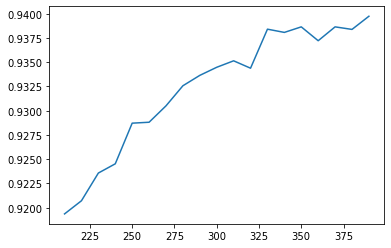

In [19]:
#======【TIME WARNING: 5 mins】======#
#学习曲线 
%matplotlib inline
import matplotlib.pyplot as plt
 
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

In [21]:
#返回卡方值和p值
chivalue, pvalues_chi = chi2(X_fsvar,y)
print(chivalue)
print("--------")
print(pvalues_chi)
#说明所有的特征都和标签相关，有贡献的砍掉，模型效果自然下降

[ 945664.84392643 1244766.05139164 1554872.30384525 1834161.78305343
 1903618.94085294 1845226.62427198 1602117.23307537  708535.17489837
  974050.20513718 1188092.19961931 1319151.43467036 1397847.8836796
 1433554.26798015 1429043.15373433 1332663.17213405 1101423.25372261
  809989.56940485  519266.71772284  285681.88297156  191589.23696468
  902883.1255264  1237265.16042373 1503477.73699155 1625807.41495542
 1630206.90922916 1630597.02883804 1633456.72909664 1610816.75571229
 1483382.49543886 1256290.1574794   951236.1617682   693192.66191748
  532386.96220361  504617.38933715  575090.36046243  501025.03733245
  802341.10683194 1078344.8724406  1226540.98318702 1269945.07968831
 1221758.57688808 1146535.17810241 1080657.20185303 1079065.30979135
 1092222.70610032 1064908.45385716 1023327.00231067  974163.15420165
  918857.12860617  861439.52030749  828439.23565047  916454.89464771
  989713.58229958  543695.5016699   674691.76755044  708113.57226969
  657819.3908855   599159.21961671 

In [22]:
#k（想保存的特征数量）取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

In [23]:
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

In [25]:
##3.11.F检验
#捕捉每个特征与标签之间的线性关系的过滤方法，数据服从正态分布效果比较好
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar,y)
print(F)
print("--------")
print(pvalues_f)
 
k = F.shape[0] - (pvalues_f > 0.05).sum()
 
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

[ 618.65383492  846.18897012 1115.40617051 1362.3677305  1452.03355369
 1381.09095571 1138.26505266  464.29616121  660.00977785  849.66393412
 1004.7450309  1124.76177588 1200.99190762 1209.29489877 1110.4944286
  854.66183292  577.52063451  342.09729054  178.67397866  118.01145533
  612.12261014  899.40904291 1196.17528948 1424.49864852 1569.26556677
 1742.49910702 1910.98023795 1969.20520223 1731.37475948 1295.09668012
  839.15325001  531.97951763  371.82392681  336.00820537  378.93378743
  317.47025479  528.94881012  766.40792176  947.63168717 1086.0472161
 1177.72017709 1253.79641973 1344.06961068 1507.33781169 1616.50454434
 1512.25864876 1289.65180587 1051.26276412  839.48869386  680.07426932
  600.85538567  633.55772663  683.96908509  347.65867784  452.76238211
  509.16387684  515.7498157   532.86107778  594.62512658  664.18740444
  709.37133696  798.11767931  876.69849088  852.76926441  785.70173347
  802.88980095  813.2041131   760.85552527  687.94148028  642.84071735
  698.11

In [26]:
k

392

In [27]:
#所有的特征和标签是显著线性相关的
pvalues_f > 0.05

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
##3.12互信息法可以找出任意关系
from sklearn.feature_selection import mutual_info_classif as MIC
#互信息量的估计
result = MIC(X_fsvar,y)
 
k = result.shape[0] - sum(result <= 0)
 
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

In [29]:
result

array([0.06474533, 0.08402268, 0.10095257, 0.11175676, 0.11400674,
       0.10626027, 0.08731941, 0.05024201, 0.07370452, 0.09849853,
       0.11551141, 0.14022554, 0.16119798, 0.1629451 , 0.1519468 ,
       0.1261961 , 0.09747858, 0.06868206, 0.04063791, 0.02544668,
       0.06673511, 0.09163675, 0.12472516, 0.14316305, 0.18046248,
       0.20906531, 0.22620783, 0.23090343, 0.21861828, 0.18041459,
       0.13823748, 0.10185782, 0.07348261, 0.05148023, 0.04555669,
       0.02582101, 0.05626494, 0.08111043, 0.09644865, 0.11742112,
       0.13757612, 0.14711676, 0.1663867 , 0.17912463, 0.18157898,
       0.17416582, 0.14511761, 0.13436178, 0.10782035, 0.09826506,
       0.07637018, 0.07059629, 0.06495945, 0.04455455, 0.06539678,
       0.08108076, 0.08358141, 0.09437058, 0.10267987, 0.10853684,
       0.10472361, 0.11662623, 0.12325653, 0.11559637, 0.10707986,
       0.11651853, 0.11312539, 0.10720981, 0.09009284, 0.07956601,
       0.0747638 , 0.0385798 , 0.0537361 , 0.06174975, 0.06912

In [30]:
#没有任何的特征和标签的互信息量为0
(result == 0).sum()

0